# Breast Cancer Dataset Analysis

This notebook focuses on analyzing the **Breast Cancer Wisconsin (Diagnostic)** dataset. The tasks include:

1. Installing required libraries.
2. Fetching the dataset from the UCI Machine Learning Repository.
3. Exploring the dataset to understand its structure and properties.
4. Preparing the dataset by splitting it into training and testing sets using various proportions.
5. Visualizing class distributions to ensure stratification in the splits.

We will use the following tools and libraries:
- `ucimlrepo` to fetch the dataset.
- `pandas` for data manipulation.
- `matplotlib` and `seaborn` for data visualization.
- `scikit-learn` for splitting the dataset into training and testing subsets.

### Step 0: Install Necessary Libraries

Before running the notebook, make sure you have all the required Python libraries installed:
- **ucimlrepo**: Fetches datasets from the UCI Machine Learning Repository.
- **pandas**: Handles data manipulation and analysis.
- **matplotlib** and **seaborn**: For creating visualizations.
- **scikit-learn**: Provides tools for splitting datasets and building machine learning models.

Run the following code to install them if they are not already installed.


In [48]:
# Install required libraries (run this cell only if needed)
%pip install ucimlrepo pandas matplotlib seaborn scikit-learn graphviz

### Step 1: Import Libraries

We begin by importing the necessary libraries for data loading, manipulation, and visualization.

In [108]:
# Import libraries
from ucimlrepo import fetch_ucirepo  # Fetch dataset from UCI repository
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Advanced visualization

# Set plotting style for consistency
sns.set_style('whitegrid')


### Step 2: Fetch the Dataset

The **Breast Cancer Wisconsin (Diagnostic)** dataset is fetched from the UCI Machine Learning Repository using the `ucimlrepo` library. 


In [111]:
# Fetch the dataset using its unique ID
breast_cancer_data = fetch_ucirepo(id=17)

#### Dataset metadata

In [10]:
# View metadata about the dataset
breast_cancer_data.metadata

{'uci_id': 17,
 'name': 'Breast Cancer Wisconsin (Diagnostic)',
 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic',
 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv',
 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 569,
 'num_features': 30,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['Diagnosis'],
 'index_col': ['ID'],
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1993,
 'last_updated': 'Fri Nov 03 2023',
 'dataset_doi': '10.24432/C5DW2B',
 'creators': ['William Wolberg',
  'Olvi Mangasarian',
  'Nick Street',
  'W. Street'],
 'intro_paper': {'ID': 230,
  'type': 'NATIVE',
  'title': 'Nuclear feature extraction for breast tumor diagnosis',
  'authors': 'W. Street, W. Wolberg, O. Mangasarian',
  'venue': 'Electronic imaging',
  'yea

#### Variable Information

The variable information describes:
- The features (input variables) in the datase`.
- The target variable (`M` for malignant, `B` for benign).

In [14]:
# View feature and variable information
breast_cancer_data.variables


,name,role,type,demographic,description,units,missing_values
0,ID,ID,Categorical,None,None,None,no
1,Diagnosis,Target,Categorical,None,None,None,no
2,radius1,Feature,Continuous,None,None,None,no
3,texture1,Feature,Continuous,None,None,None,no
4,perimeter1,Feature,Continuous,None,None,None,no
5,area1,Feature,Continuous,None,None,None,no
6,smoothness1,Feature,Continuous,None,None,None,no
7,compactness1,Feature,Continuous,None,None,None,no
8,concavity1,Feature,Continuous,None,None,None,no
9,concave_points1,Feature,Continuous,None,None,None,no


#### Extract Features and Labels

After fetching and examining the dataset, we will extract:
- **Features**: The numerical columns describing tumor properties.
- **Labels**: The target column, which indicates whether the tumor is malignant (`M`) or benign (`B`).


In [17]:
# Extract features and labels
features = breast_cancer_data.data.features  # Features (30 columns)
labels = breast_cancer_data.data.targets     # Labels ('M' for malignant, 'B' for benign)


Preview first 5 rows of `features`

In [20]:
features.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Preview first 5 rows of `labels`

In [23]:
labels.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


## 2.1. Prepare the datasets

We will split the dataset into training and testing subsets with the following proportions:
- **40% Training / 60% Testing**
- **60% Training / 40% Testing**
- **80% Training / 20% Testing**
- **90% Training / 10% Testing**

In [83]:
# Define train-test proportions
train_sizes = [0.4, 0.6, 0.8, 0.9]

# Create a dictionary to store the splits
splits = {}


### Step 1: Perform Stratified Shuffle Split

Using the defined train-test proportions, we will:
1. Split the dataset into `feature_train`, `feature_test`, `label_train`, and `label_test` subsee2s.
3. Store the splits in a dictionary, where each key corresponds to the train-test proportion.


In [89]:
# Import StratifiedShuffleSplit to split the dataset into training and testing subsets
from sklearn.model_selection import StratifiedShuffleSplit


# Perform stratified splitting for each proportion
for train_size in train_sizes:
    sss = StratifiedShuffleSplit(n_splits=1, train_size=train_size, random_state=42)
    for train_index, test_index in sss.split(features, labels):
        feature_train = features.iloc[train_index]
        feature_test = features.iloc[test_index]
        label_train = labels.iloc[train_index]
        label_test = labels.iloc[test_index]
    
    # Store the splits in the dictionary
    splits[f'{int(train_size * 100)}/{int(round((1 - train_size) * 100))}'] = {
        'feature_train': feature_train,
        'feature_test': feature_test,
        'label_train': label_train,
        'label_test': label_test
    }


### Step 2: Confirm Splits

We will now verify that the splits were created correctly by:
1. Checking the structure of the dictionary where splits are stored.
2. Displaying a few rows from all the splits to confirm that the data is organized as expected.

In [92]:
# Display the keys of the splits dictionary to confirm the proportions
splits.keys()

dict_keys(['40/60', '60/40', '80/20', '90/10'])

First 5 rows of the training features and labels for 80/20 split

In [95]:
# Access and display a sample from the 80/20 split
feature_train = splits['80/20']['feature_train']
feature_test = splits['80/20']['feature_test']
label_train = splits['80/20']['label_train']
label_test = splits['80/20']['label_test']

# Show the shape of the training features, test features, training labels and test labels for 80/20 split
feature_train.shape, feature_test.shape, label_train.shape, label_test.shape

((455, 30), (114, 30), (455, 1), (114, 1))

## 2.2. Build the decision tree classifiers

We will now train a **Decision Tree Classifier** on the **80/20 training data** (`feature_train` and `label_train`). 

### Parameters:
- **criterion='entropy'**: The splitting criterion is information gain (entropy).
- **random_state=42**: Ensures reproducibility of the training process.

This classifier will learn to differentiate between malignant and benign tumors based on the training data.


In [98]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=2)

# Train the classifier on the training data
clf.fit(feature_train, label_train)


DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

### Step 1: Export the Decision Tree to Graphviz Format
We export the trained decision tree to Graphviz's DOT format, which allows us to visualize the tree structure..rovement.


In [101]:
from sklearn.tree import export_graphviz

# Export the decision tree to DOT format
dot_data = export_graphviz(
    clf,
    out_file=None,  # Do not save to file
    feature_names=feature_train.columns,  # Feature names
    class_names=clf.classes_,  # Class names
    filled=True,  # Fill nodes with colors
    rounded=True,  # Use rounded edges
    special_characters=True,  # Allow special characters
    max_depth=2  # Visualize tree up to depth 2, as shown in the PDF example
)



### Step 2: Visualize the Decision Tree Using Graphviz

The DOT data is converted to an image using Graphviz. This visualization provides a graphical representation of the decision tree:
- Splits based on feature thresholds.
- The reduction in entropy at each split.
- Predicted class and sample counts at leaf nodes.
able.

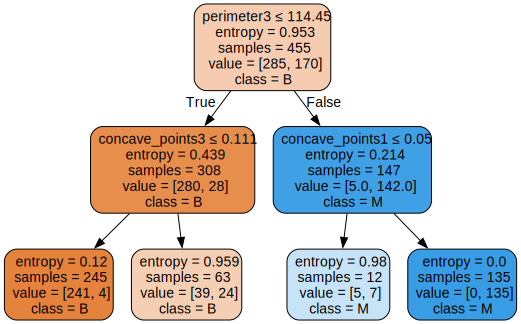

In [122]:
# Render and display using Graphviz
graph = Source(dot_data)
graph.render("decision_tree_graphviz", format="png", cleanup=True)
graph

## 2.3: Evaluating the Decision Tree Classifier

After training the Decision Tree Classifier on the **80/20 split**, we evaluate its performance on the test set. This process involves:

### **Tasks:**
1. **Make Predictions**:
   - Use the trained model to predict labels for the testing dataset.
2. **Compute Metrics**:
   - **Accuracy Score**: Measures the proportion of correctly predicted samples out of the total number of samples.
   - **Confusion Matrix**: Provides a detailed breakdown of:
     - True Positives (correctly predicted malignant cases)
     - True Negatives (correctly predicted benign cases)
     - False Positives (benign cases incorrectly predicted as malignant)
     - False Negatives (malignant cases incorrectly predicted as benign)
   - **Classification Report**: Includes precision, recall, and F1-score for each class (malignant and benign).

The following code performs these tasks and displays the results in a tabular format for better interpretability.


In [133]:
from IPython.display import display
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test set
predictions = clf.predict(feature_test)

# Compute evaluation metrics
accuracy = accuracy_score(label_test, predictions)
conf_matrix = confusion_matrix(label_test, predictions)
class_report = classification_report(label_test, predictions, target_names=['Benign', 'Malignant'], output_dict=True)

# Visualize Accuracy
accuracy_df = pd.DataFrame({"Metric": ["Accuracy"], "Value": [accuracy]})
display(accuracy_df)

# Visualize Confusion Matrix
conf_matrix_df = pd.DataFrame(
    conf_matrix, 
    index=['True Benign', 'True Malignant'], 
    columns=['Predicted Benign', 'Predicted Malignant']
)
display(conf_matrix_df)

# Visualize Classification Report
class_report_df = pd.DataFrame(class_report).transpose()
display(class_report_df)


,Metric,Value
0,Accuracy,0.885965


,Predicted Benign,Predicted Malignant
True Benign,72,0
True Malignant,13,29


,precision,recall,f1-score,support
Benign,0.847059,1.000000,0.917197,72.000000
Malignant,1.000000,0.690476,0.816901,42.000000
accuracy,0.885965,0.885965,0.885965,0.885965
macro avg,0.923529,0.845238,0.867049,114.000000
weighted avg,0.903406,0.885965,0.880246,114.000000


#### Heatmap

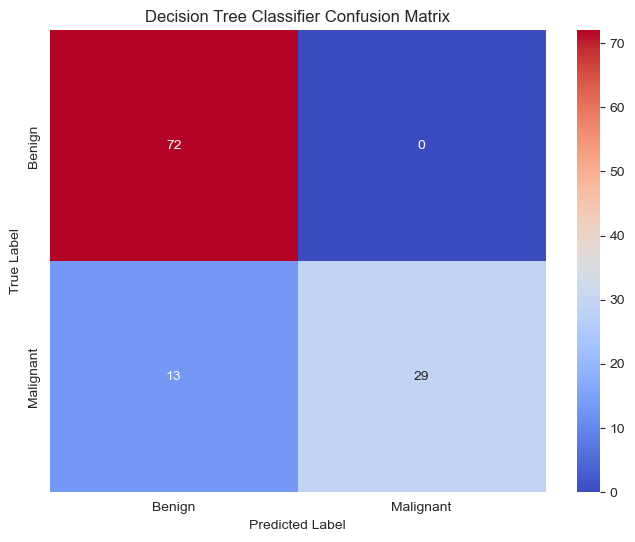

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(label_test, predictions)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix, 
    annot=True,  # Display the numbers in the cells
    fmt="d",     # Format the numbers as integers
    cmap="coolwarm",  # Color map
    xticklabels=['Benign', 'Malignant'],  # Labels for columns
    yticklabels=['Benign', 'Malignant']   # Labels for rows
)

# Add labels and title
plt.title("Decision Tree Classifier Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#### Key Insights:
1. **Benign Class (B)**:
   - Perfect recall (100%): All benign cases are identified correctly.
   - Precision: 84.71% (some predictions for benign are incorrect).

2. **Malignant Class (M)**:
   - Recall: 69.05% (many malignant cases are missed).
   - Precision: 100% (all malignant predictions are correct).

3. **Overall Accuracy**:
   - The model achieves an accuracy of **88.60%**, but the low recall for malignant cases is a concern.

---

The decision tree classifier demonstrates strong performance with perfect precision for malignant cases and perfect recall for benign cases, ensuring no benign cases are misclassified as malignant. However, its major weakness lies in the low recall for malignant cases (69.05%), which indicates a significant number of malignant cases are misclassified as benign, potentially leading to missed diagnoses.


## 2.4. The Depth and Accuracy of a Decision Tree

This task examines how the depth of a decision tree affects its classification accuracy using the **80/20 split**. We will:
1. Train the decision tree classifier for different values of `max_depth`: `[None, 2, 3, 4, 5, 6, 7]`.
2. Visualize the decision trees for each depth using Graphviz.
3. Compute the **accuracy score** on the test set for each depth.
4. Provide charts  on the statistics

In [199]:
from sklearn.tree import export_graphviz

# Define depths to evaluate
depths = [1, 2, 3, 4, 5, 6, 7]

# Store accuracy results
accuracy_results = []

# Train and evaluate the model for each depth
for depth in depths:
    # Train decision tree
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=depth)
    clf.fit(feature_train, label_train)
    
    # Predict and evaluate accuracy
    predictions = clf.predict(feature_test)
    accuracy = accuracy_score(label_test, predictions)
    accuracy_results.append({'max_depth': depth, 'accuracy': accuracy})


### Decision Trees Visualizations for different `max_depth`
Below are visualizations of the Decision Tree classifier for selected values of `max_depth`. Each visualization highlights how the tree's complexity evolves with increasing depth.

---

Tree with max_depth=1:

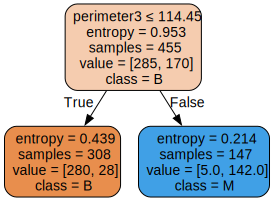

In [169]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=1)

# Train the classifier on the training data
clf.fit(feature_train, label_train)

# Export the decision tree to DOT format
depth_1 = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_train.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=1
)

# Render and display using Graphviz
graph = Source(depth_1)
graph.render("max_depth_1_decision_tree", format="png", cleanup=True)
graph

Tree with max_depth=2:

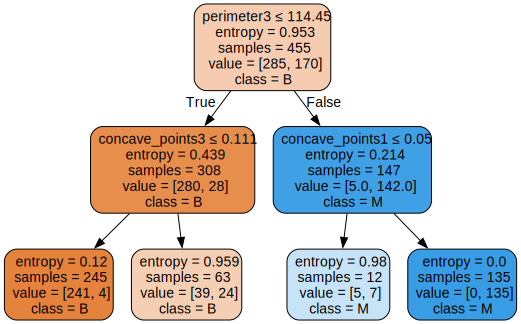

In [181]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=2)

# Train the classifier on the training data
clf.fit(feature_train, label_train)

# Export the decision tree to DOT format
depth_2 = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_train.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=2
)

# Render and display using Graphviz
graph = Source(depth_2)
graph.render("max_depth_2_decision_tree", format="png", cleanup=True)
graph

Tree with max_depth=3:

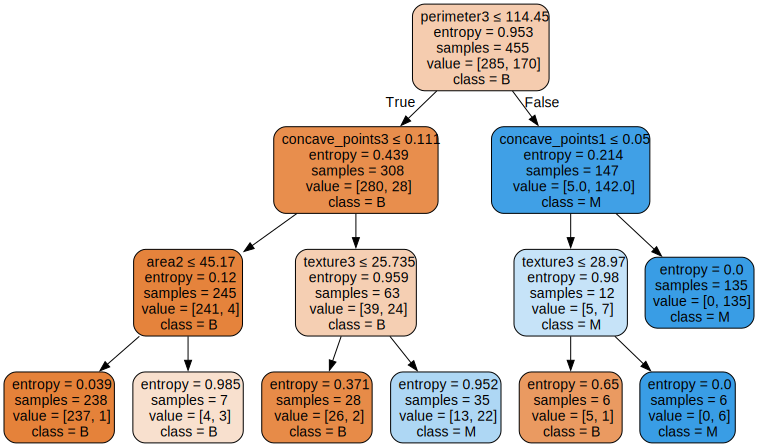

In [184]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=3)

# Train the classifier on the training data
clf.fit(feature_train, label_train)

# Export the decision tree to DOT format
depth_3 = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_train.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=3
)

# Render and display using Graphviz
graph = Source(depth_3)
graph.render("max_depth_3_decision_tree", format="png", cleanup=True)
graph

Tree with max_depth=4:

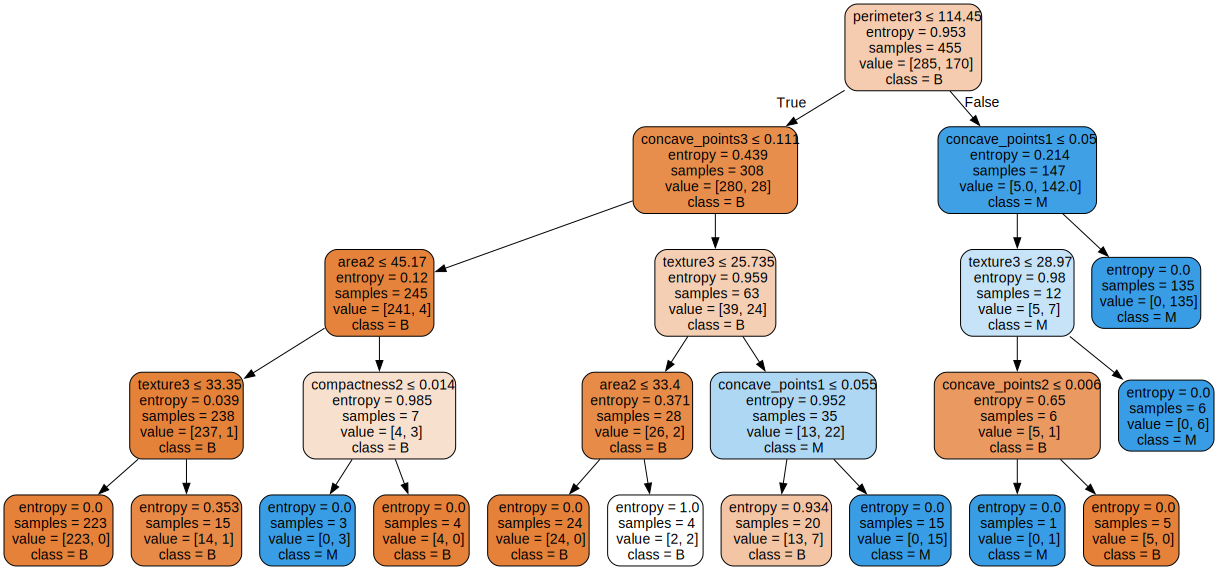

In [187]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=4)

# Train the classifier on the training data
clf.fit(feature_train, label_train)

# Export the decision tree to DOT format
depth_4 = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_train.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=4
)

# Render and display using Graphviz
graph = Source(depth_4)
graph.render("max_depth_4_decision_tree", format="png", cleanup=True)
graph

Tree with max_depth=5:

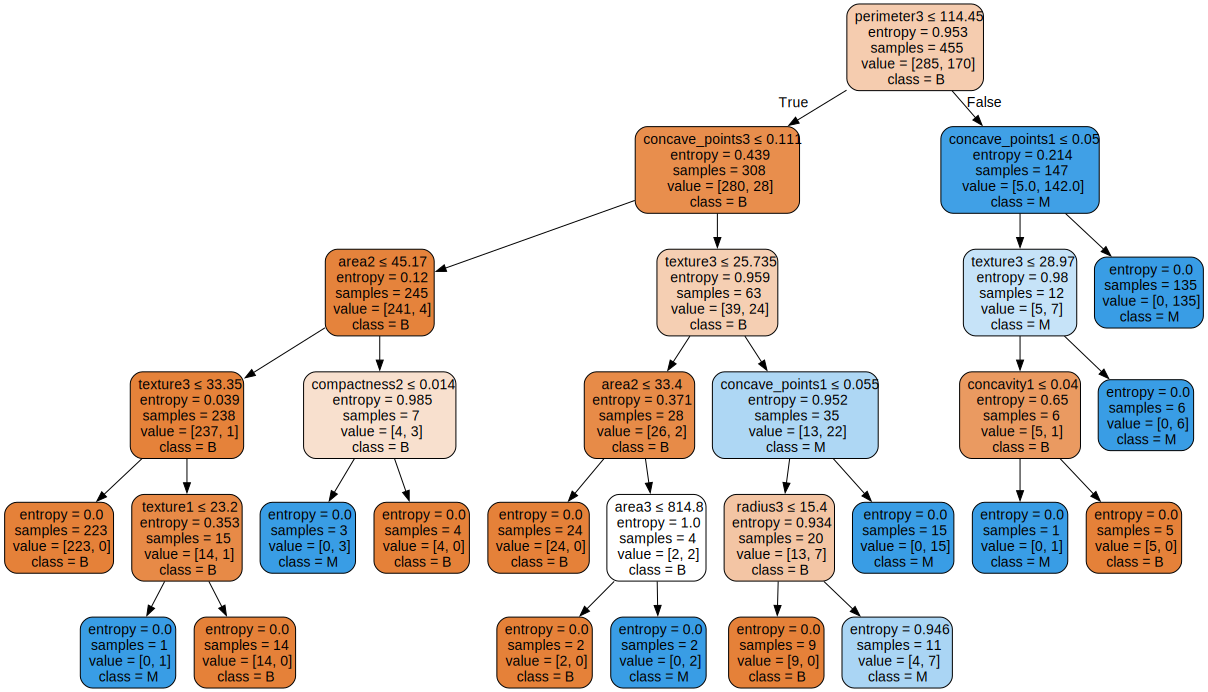

In [190]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=5)

# Train the classifier on the training data
clf.fit(feature_train, label_train)

# Export the decision tree to DOT format
depth_5 = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_train.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=5
)

# Render and display using Graphviz
graph = Source(depth_5)
graph.render("max_depth_5_decision_tree", format="png", cleanup=True)
graph

Tree with max_depth=6:

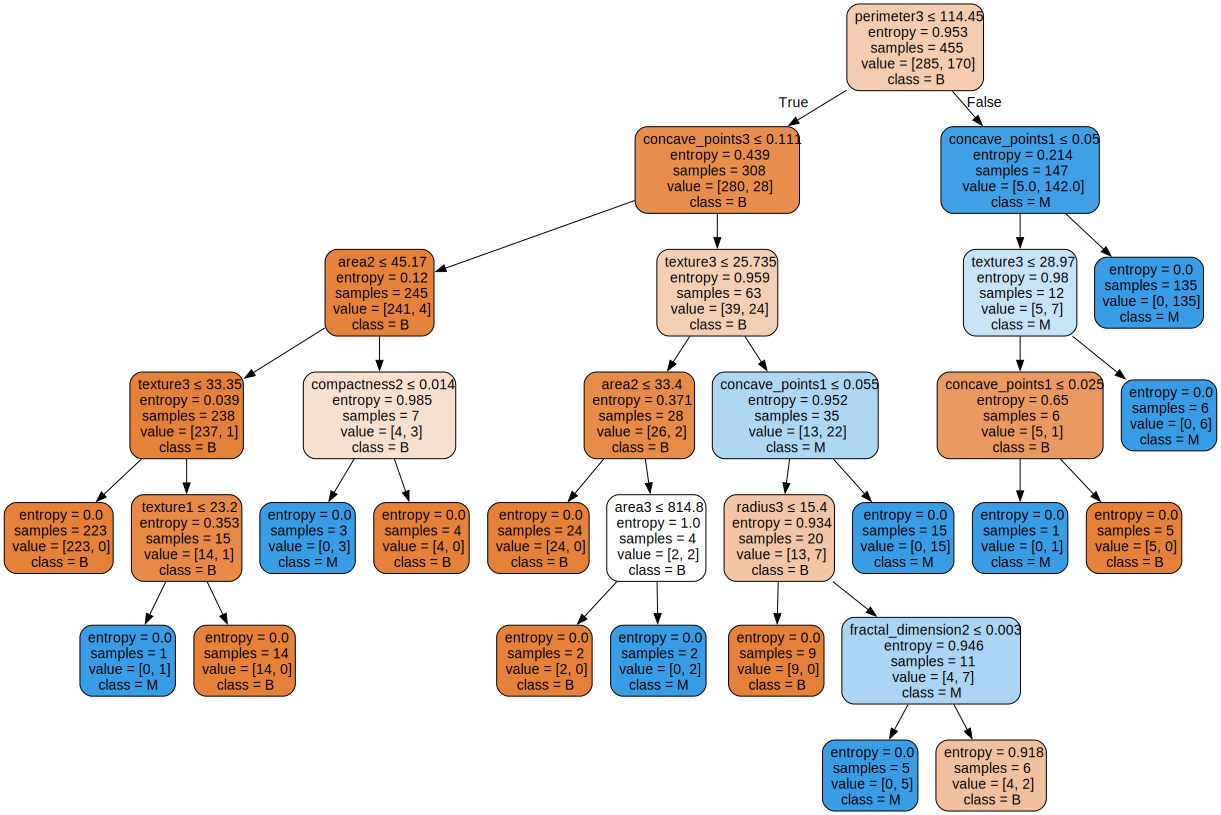

In [193]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=6)

# Train the classifier on the training data
clf.fit(feature_train, label_train)

# Export the decision tree to DOT format
depth_6 = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_train.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=6
)

# Render and display using Graphviz
graph = Source(depth_6)
graph.render("max_depth_6_decision_tree", format="png", cleanup=True)
graph

Tree with max_depth=7:

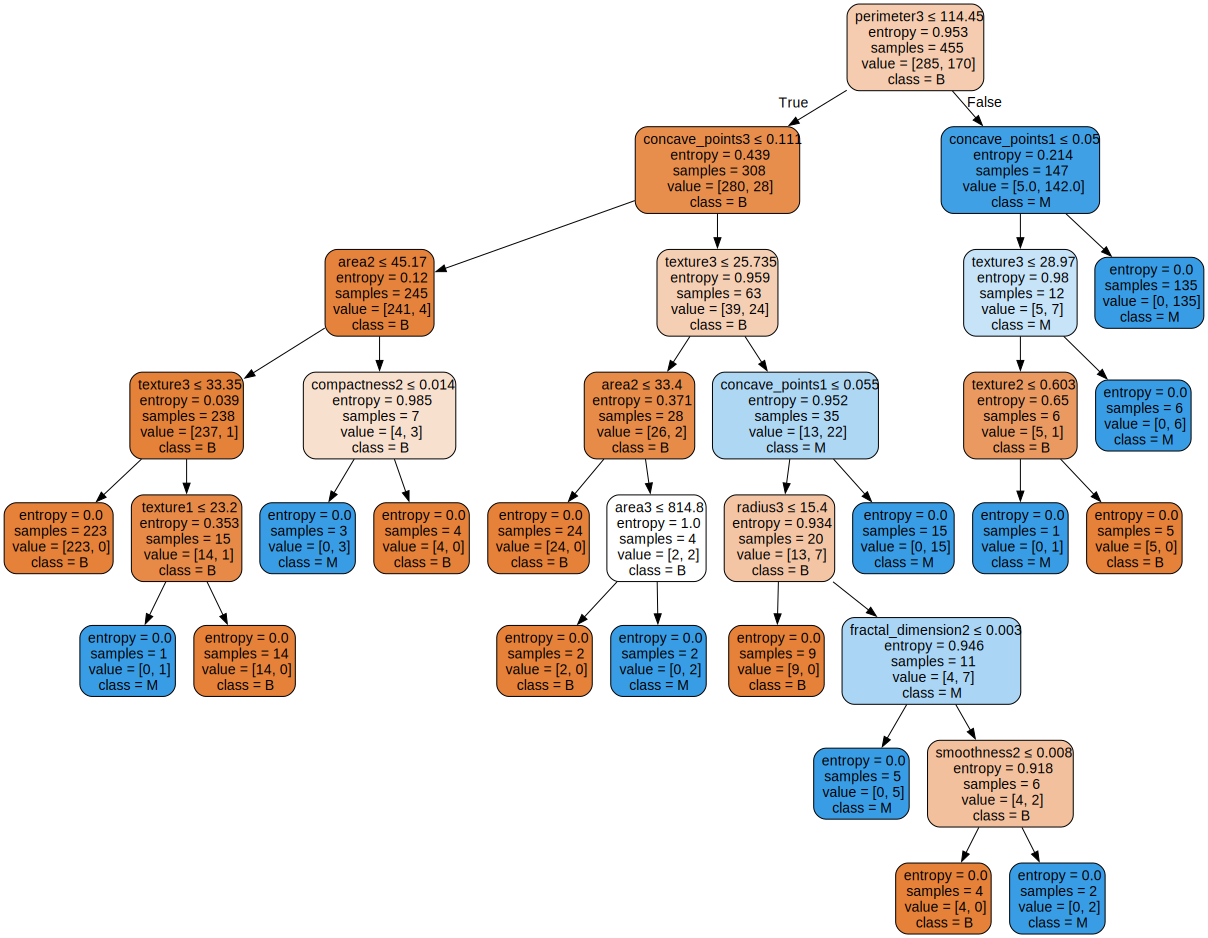

In [196]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=7)

# Train the classifier on the training data
clf.fit(feature_train, label_train)

# Export the decision tree to DOT format
depth_7 = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_train.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=7
)

# Render and display using Graphviz
graph = Source(depth_7)
graph.render("max_depth_7_decision_tree", format="png", cleanup=True)
graph

### Accuracy of Decision Tree Classifier for Different `max_depth`

The table below shows the test set accuracy for the Decision Tree Classifier with varying values of `max_depth`. This highlights how the depth of the tree affects its performance.

In [205]:
# Convert accuracy results to DataFrame and set max_depth as the index
accuracy_df = pd.DataFrame(accuracy_results)
accuracy_df.set_index('max_depth', inplace=True)

# Display the DataFrame
accuracy_df


,accuracy
max_depth,
1,0.885965
2,0.885965
3,0.938596
4,0.929825
5,0.956140
6,0.929825
7,0.956140


### Accuracy vs. max_depth Chart

Below is a chart showing how the accuracy of the Decision Tree Classifier changes with different values of `max_depth`. This visualization helps identify the optimal depth for the model.

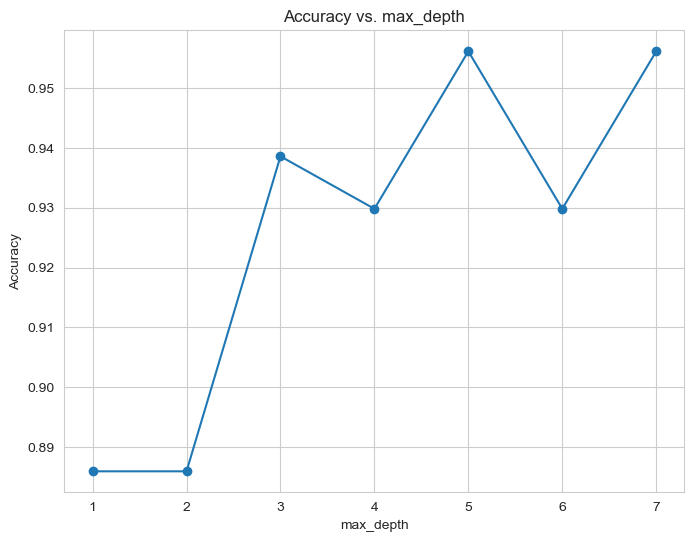

In [208]:
import matplotlib.pyplot as plt

# Plot accuracy vs. max_depth
plt.figure(figsize=(8, 6))
plt.plot(accuracy_df.index, accuracy_df['accuracy'], marker='o', linestyle='-')

# Add labels and title
plt.title("Accuracy vs. max_depth")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.xticks(accuracy_df.index)  # Ensure x-axis labels match depth values
plt.grid(True)
plt.show()


## Insights from Accuracy vs. max_depth Chart

### Observations:
1. **Shallow Depths (`max_depth=1` to `max_depth=2`)**:
   - Accuracy starts low (around 88.9%) at `max_depth=1` due to underfitting.
   - Increasing the depth to `max_depth=2` shows a significant improvement in accuracy, as the tree begins to capture important patterns in the data.

2. **Intermediate Depths (`max_depth=3` to `max_depth=4`)**:
   - Accuracy peaks at `max_depth=3` and `4` with values above 94%, suggesting these depths capture the optimal balance of complexity and generalization.

3. **Deeper Depths (`max_depth=5` to `max_depth=7`)**:
   - Accuracy fluctuates, with another peak at `max_depth=7`. These fluctuations may indicate overfitting, where the tree models noise in the training data, reducing test performance.

### Insights:
- **Optimal Depth**: The best balance between accuracy and generalization occurs at `max_depth=3` or `4`, achieving high accuracy while avoiding overfitting.

---

## Insights for the Whole Work

### Overall Performance:
1. **Strengths**:
   - The decision tree classifier achieves high accuracy, with peak performance at intermediate depths.
   - Benign cases are well-classified, with perfect recall in many scenarios.

2. **Weaknesses**:
   - Malignant cases exhibit lower recall, with a significant number of false negatives. This is a critical weakness in medical diagnoses, where failing to detect malignant cases has severe consequences.

---

### Process Analysis:
1. **Dataset Preparation**:
   - The use of stratified splits ensures the class distribution is consistent across training and testing datasets, improving model reliability.

2. **Model Evaluation**:
   - The analysis of metrics like accuracy, confusion matrix, and classification report provided detailed insights into model performance.
   - Visualizations like the confusion matrix heatmap and decision tree diagrams helped interpret results effectively.

3. **Hyperparameter Tuning**:
   - Testing different `max_depth` values revealed how model complexity impacts accuracy and generalization.
   - The model performed optimally at intermediate depths, balancing simplicity and performance.

---

### Recommendations:
1. **Focus on Recall for Malignant Cases**:
   - Improve recall for malignant cases by tuning hyperparameters or using techniques like class weighting or resampling.
2. **Explore Ensemble Methods**:
   - Methods like Random Forests or Boosting may improve performance by reducing overfitting and balancing class-specific metrics.
3. **Further Validation**:
   - Use cross-validation to ensure consistent performance across different splits and avoid overfitting.
4. **Deploy with Caution**:
   - While the classifier performs well overall, improvements are needed in detecting malignant cases to ensure reliable medical application.

---

### Conclusion:
This work demonstrates the effectiveness of decision trees in classifying benign and malignant cases, with clear insights into how depth impacts performance. While the classifier achieves strong results for benign cases, improving recall for malignant cases is essential for deployment in high-stakes scenarios such as medical diagnostics.
